In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 01')

In [3]:
df.head()

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,5666,4310.779038
1,2021,September,1 North West Metro,Brimbank,13161,6488.330843
2,2021,September,1 North West Metro,Darebin,10191,6180.887689
3,2021,September,1 North West Metro,Hobsons Bay,4473,4594.609322
4,2021,September,1 North West Metro,Hume,13396,5455.211528


## ANALYSIS OF "Rate per 100k population" OVER 10 YEARS FOR EACH POLICE REGION

In [4]:
fc = df.loc[df['Local Government Area']=='Total',['Year','Police Region','Rate per 100,000 population']]
fc.shape

(60, 3)

In [5]:
c = fc.dropna(axis=0, how='any')
c.shape

(40, 3)

In [6]:
cdf = c.groupby('Year')['Rate per 100,000 population'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

,sum,mean,median,var,std
Year,,,,,
2012,23054.335049,5763.583762,5564.572473,1.643993e+06,1282.183079
2013,22930.006878,5732.501719,5668.852999,1.119549e+06,1058.087319
2014,23052.101014,5763.025253,5592.384465,1.090317e+06,1044.182483
2015,23525.295314,5881.323828,5834.127108,1.049238e+06,1024.323354
2016,26304.424362,6576.106091,6615.994833,1.126857e+06,1061.535208
2017,24513.676581,6128.419145,6221.222870,6.372069e+05,798.252387
2018,23381.386685,5845.346671,5841.780765,7.264892e+05,852.343375
2019,23847.412681,5961.853170,6025.994389,4.297791e+05,655.575431
2020,24287.388910,6071.847227,6078.462873,4.468482e+05,668.467085


In [7]:
Total = c.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Total.describe()

count       10.000000
mean     23614.445798
std       1304.284893
min      21248.430506
25%      23052.659522
50%      23453.340999
75%      24177.394853
max      26304.424362
Name: Rate per 100,000 population, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

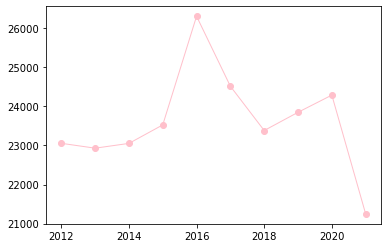

In [8]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [9]:
NorthWestMetro = c[c['Police Region']=='1 North West Metro']
del NorthWestMetro['Police Region']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
NorthWestMetro

Year
2012    7505.489894
2013    7088.780088
2014    7184.280200
2015    7176.760110
2016    7819.459513
2017    6947.348480
2018    6859.643224
2019    6646.833174
2020    6881.666525
2021    5930.846326
Name: Rate per 100,000 population, dtype: float64

In [10]:
Eastern = c[c['Police Region']=='2 Eastern']
del Eastern['Police Region']
Eastern= Eastern.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Eastern

Year
2012    4419.700209
2013    4503.520791
2014    4683.051883
2015    4680.280989
2016    5252.975183
2017    5123.882360
2018    4838.181932
2019    5148.590730
2020    5248.796638
2021    4722.148782
Name: Rate per 100,000 population, dtype: float64

In [11]:
SouthernMetro = c[c['Police Region']=='3 Southern Metro']
del SouthernMetro['Police Region']
SouthernMetro = SouthernMetro.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
SouthernMetro

Year
2012    5485.485881
2013    5650.702705
2014    5477.479041
2015    5727.823583
2016    6415.015183
2017    5893.613232
2018    5580.759743
2019    5751.662615
2020    6018.306285
2021    4983.311003
Name: Rate per 100,000 population, dtype: float64

In [12]:
Western = c[c['Police Region']=='4 Western']
del Western['Police Region']
Western = Western.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Western

Year
2012    5643.659065
2013    5687.003294
2014    5707.289890
2015    5940.430632
2016    6816.974482
2017    6548.832509
2018    6102.801786
2019    6300.326162
2020    6138.619462
2021    5612.124395
Name: Rate per 100,000 population, dtype: float64

In [13]:
Justice = c[c['Police Region']=='Justice Institutions and Immigration Facilities']
del Justice['Police Region']
Justice = Justice.groupby(['Year'])['Rate per 100,000 population'].agg('sum')
Justice

Series([], Name: Rate per 100,000 population, dtype: float64)

<function matplotlib.pyplot.show(close=None, block=None)>

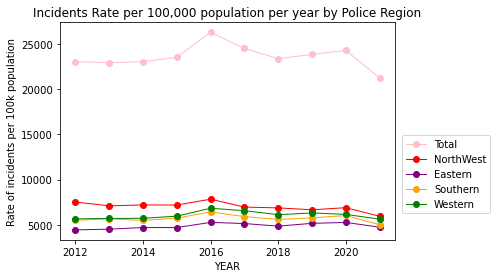

<Figure size 57600x43200 with 0 Axes>

In [14]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,NorthWestMetro, marker="o", color="red", linewidth=1, label="NorthWest")
plt.plot(x,Eastern, marker="o", color="purple", linewidth=1, label="Eastern")
plt.plot(x,SouthernMetro, marker="o", color="orange", linewidth=1, label="Southern")
plt.plot(x,Western, marker="o", color="green", linewidth=1, label="Western")
#plt.plot(x,Justice, marker="o", color="blue", linewidth=1, label="Facility")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.1))
plt.title("Incidents Rate per 100,000 population per year by Police Region")
plt.xlabel("YEAR")
plt.ylabel("Rate of incidents per 100k population")
plt.figure(figsize=(800,600))
plt.show